In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
x=np.arange(0,6,0.1)

In [30]:
y1=np.sin(x)
y2=np.cos(x)

Text(0, 0.5, 'y')

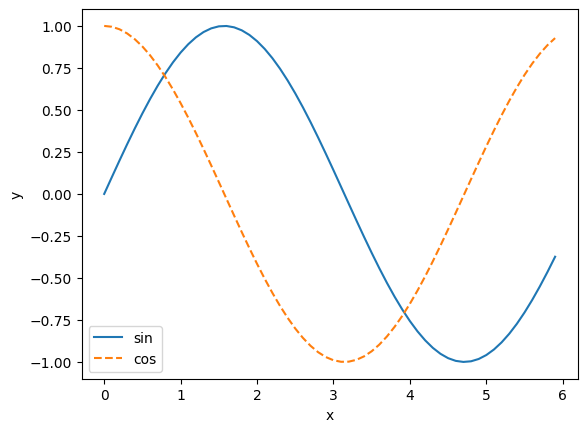

In [31]:
plt.plot(x,y1,label='sin')
plt.plot(x,y2,linestyle='--',label='cos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [32]:
x=np.array([1,2])

In [33]:
y=x>0

In [34]:
y.astype(int)

array([1, 1])

In [35]:
a='s'

### 阶跃函数

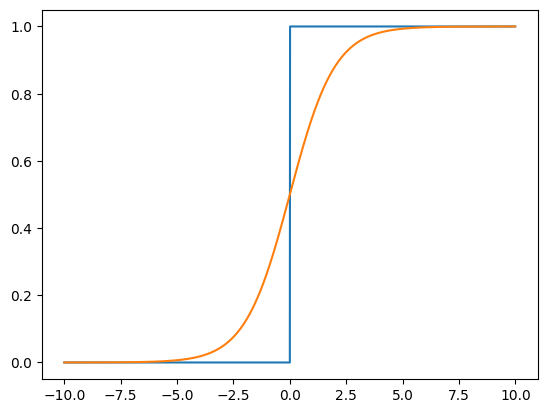

In [41]:
def step_functio(x):
    return (x>0).astype(int)
x=np.arange(-10,10,0.01)
y1=step_functio(x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
y2=sigmoid(x)

plt.plot(x,y1)
plt.plot(x,y2)

In [42]:
np.max
np.maximum

<ufunc 'maximum'>

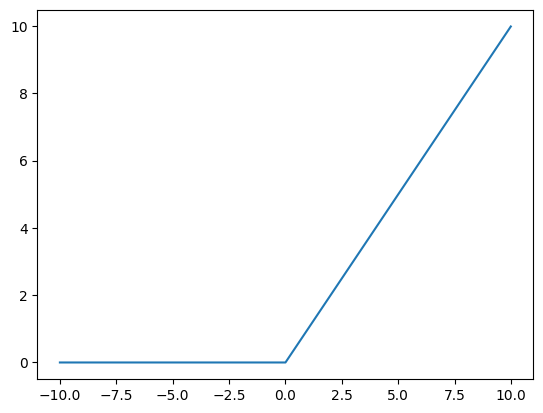

In [43]:
def relu(x):
    return np.maximum(0,x)
x=np.arange(-10,10,0.01)
y1=relu(x)
plt.plot(x,y1)

### 矩阵乘法

In [44]:
x=np.array([[1,2,3],[2,3,4]])
y=np.array([1,1,1,1,1,1]).reshape(3,2)

In [45]:
np.dot(x,y)

array([[6, 6],
       [9, 9]])

### 神经网络实现

In [46]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network


def softmax(x):
    ##softmax溢出对策
    c=np.max(x)
    return np.exp(x-c)/(np.exp(x-c)).sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def identity_function(x):
    return softmax(x)



In [47]:
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    #第一层
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    #第二层
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    #第三层
    a3=np.dot(z2,W3)+b3

    
    y=identity_function(a3)
    return y

In [48]:
x=np.array([1.0,0.5])
forward(init_network(),x)

array([0.40625907, 0.59374093])

In [49]:
def softmax(x):
    c=np.max(x)
    return np.exp(x-c)/(np.exp(x-c)).sum()

### 手写体识别

In [50]:
import os
import sys
sys.path.append("./book_material")
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image
import pickle


In [75]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
img = get_data()[0][0].reshape(28,28)
img_show(img)
label = t_train[0]
print(label) # 5

5


1. 数据本质未丢失

虽然归一化后像素值范围从0-255变为0-1，但所有像素间的相对亮度关系完全保留
例如原本127灰度的像素会变成0.5，依然是中等亮度值
模型通过相对亮度识别特征，而非绝对像素值

如果不归一化，会存在非常大的数导致e-x出现内存溢出

In [67]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,one_hot_label=False)
    return x_test, t_test
def init_network():
    with open(r"./book_material/ch03/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [68]:
x_test,t_test=get_data()
network=init_network()

In [69]:
accracy=0
for i in range(x_test.shape[0]):
    y=predict(network,x_test[i])
    r=np.argmax(y)
    if r==t_test[i]:
        accracy+=1
print(accracy/x_test.shape[0])

0.9352
